In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

### Read dataset

In [14]:
df_set = pd.read_excel("data/set_corectat_complet.xlsx")

In [15]:
# Remove rows with missing values in the relevant columns
data_cleaned = df_set.dropna(subset=["MTX - Presiunea aerului_Valoare [mbar]", "MTX - Temperatura aer_Valoare [°C]"])

# Extract data for clustering
cluster_data_cleaned = data_cleaned[["MTX - Temperatura aer_Valoare [°C]", "MTX - Presiunea aerului_Valoare [mbar]"]]

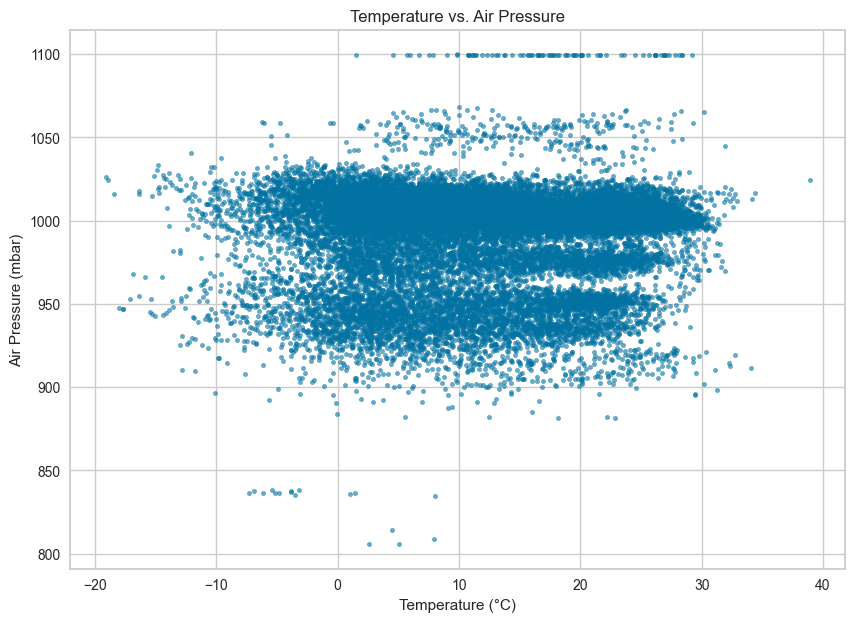

In [16]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 7))
plt.scatter(cluster_data_cleaned["MTX - Temperatura aer_Valoare [°C]"], cluster_data_cleaned["MTX - Presiunea aerului_Valoare [mbar]"], s=10, alpha=0.6)
plt.title("Temperature vs. Air Pressure")
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Pressure (mbar)")
plt.grid(True)
plt.show()


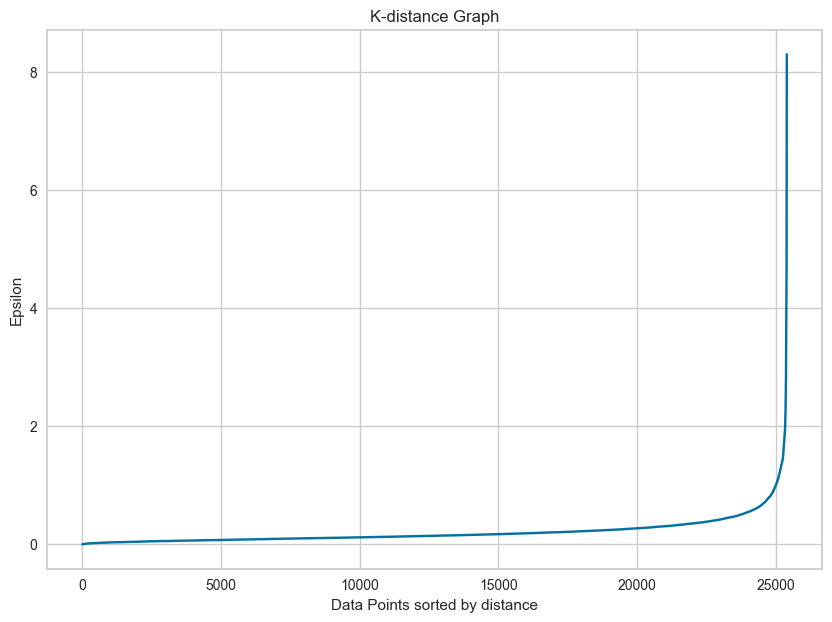

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Extract relevant columns for clustering
cluster_data = cluster_data_cleaned[["MTX - Temperatura aer_Valoare [°C]", "MTX - Presiunea aerului_Valoare [mbar]"]]

# Compute the Nearest Neighbors for each point
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(cluster_data)
distances, indices = neighbors.kneighbors(cluster_data)

# Sort the distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 7))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Epsilon")
plt.grid(True)
plt.show()


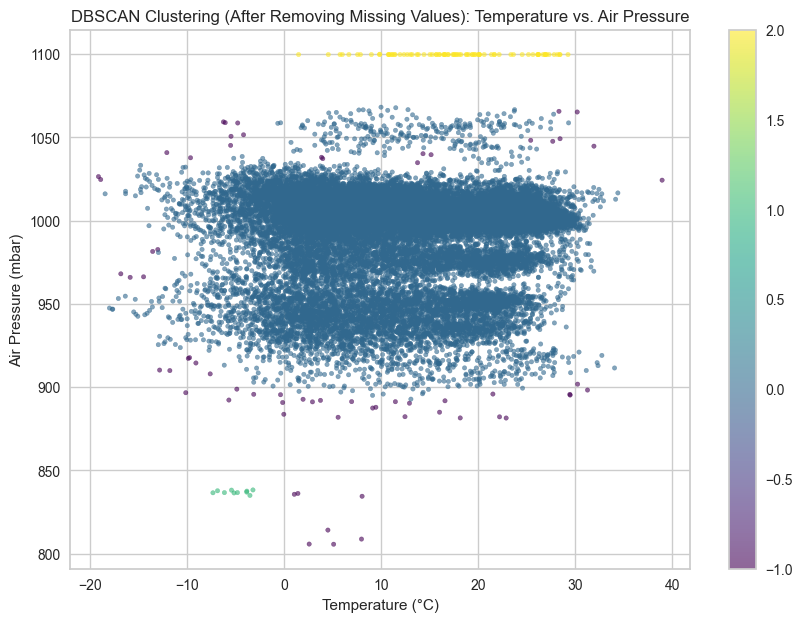

In [21]:
# Apply DBSCAN clustering using the previously defined hyperparameters
clusters_cleaned = dbscan.fit_predict(cluster_data_cleaned)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(data_cleaned["MTX - Temperatura aer_Valoare [°C]"], 
            data_cleaned["MTX - Presiunea aerului_Valoare [mbar]"], 
            c=clusters_cleaned, cmap="viridis", s=10, alpha=0.6)
plt.title("DBSCAN Clustering (After Removing Missing Values): Temperature vs. Air Pressure")
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Pressure (mbar)")
plt.colorbar()
plt.grid(True)
plt.show()







